In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\mssre\Desktop\Data\employee_churn_data.csv')
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


# Data Cleaning and Validation

In [2]:
df["status"]= (df["left"]=="yes").astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
 10  status         9540 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 782.7+ KB


# Department Stats
1) Which department has the highest employee turnover? Which one has the lowest?

In [3]:
deps=df.groupby('department')['department','status'].sum().sort_values('status',ascending=False)
dep_df= pd.DataFrame(deps)
deps.reset_index(inplace=True)
dep_df

<ipython-input-3-8cb3509e2236>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  deps=df.groupby('department')['department','status'].sum().sort_values('status',ascending=False)


,department,status
0,sales,537
1,retail,471
2,engineering,437
3,operations,436
4,marketing,243
5,support,212
6,admin,119
7,logistics,111
8,IT,110
9,finance,108


1) from the above table we can infer that sales department has highest turnover and finance the lowest.

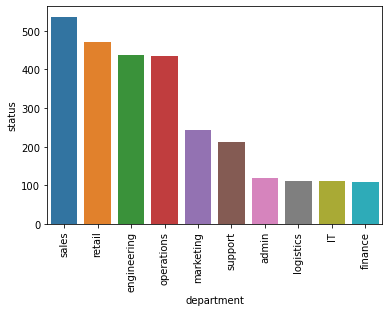

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='department',y='status',data=dep_df)
plt.xticks(rotation=90)
plt.show()

# Variable correlations

In [5]:
import numpy as np
cor= df.corr()

<AxesSubplot:>

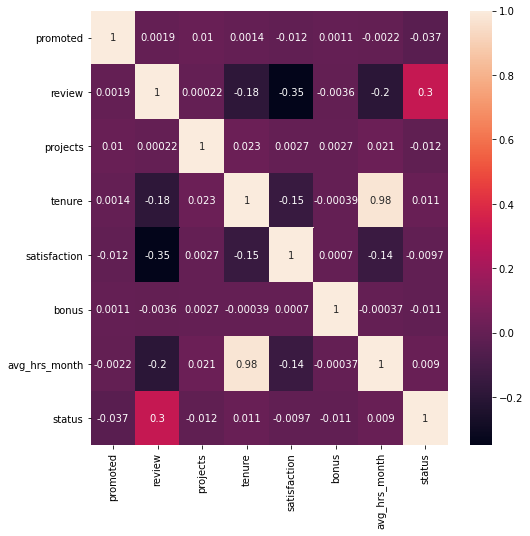

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)

We can clearly see that reviews have good positive correlation with status, it means people with good review score tend to leave the company. i.e greater the review, higher chances of status=1

Investigating which variables seem to be better predictors of employee departure.
Now let's prepare test, train data sets and test on different ML models


# 1) ML model onsidering all variables to be important and checking the performance

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
x_= df.drop(['status','left','department','salary'],axis=1)
y= df['status']
sca= StandardScaler()
sca.fit(x_)
x= sca.transform(x_)

In [8]:
# considering all variables, Logistic Regression
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)
reg= LogisticRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.7364242616703716

In [9]:
#SVM
from sklearn.svm import SVC
sv= SVC()
sv.fit(x_train,y_train)
y_pred1= sv.predict(x_test)
metrics.accuracy_score(y_test,y_pred1)

0.8450301683073992

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


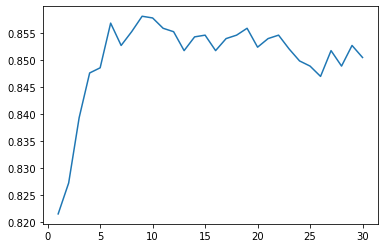

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kr= range(1,31)
scores={}
score_list= []
for k in kr:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred2= knn.predict(x_test)
    scores[k]= metrics.accuracy_score(y_test,y_pred2)
    score_list.append(metrics.accuracy_score(y_test,y_pred2))
sns.lineplot(kr,score_list)
plt.show()

we got good score for n_neighbors=9, so we take that

In [11]:
# Using KNN
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred2= knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred2)

0.8580501746586218

# 2) Model considering important variables and attempt to increase accuracy

In [12]:
x__= df.drop(['status','left','department','salary','projects','bonus','promoted'],axis=1)
y= df['status']
scat= StandardScaler()
scat.fit(x__)
x1= scat.transform(x__)
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y,test_size=0.33,random_state=42)

In [13]:
reg1= LogisticRegression()
reg1.fit(x1_train,y1_train)
y1_pred= reg1.predict(x1_test)
metrics.accuracy_score(y1_test,y1_pred)

0.73261352810416

In [14]:
#SVM
from sklearn.svm import SVC
sv1= SVC()
sv1.fit(x1_train,y1_train)
y1_pred1= sv1.predict(x1_test)
metrics.accuracy_score(y1_test,y1_pred1)

0.8618609082248333

C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


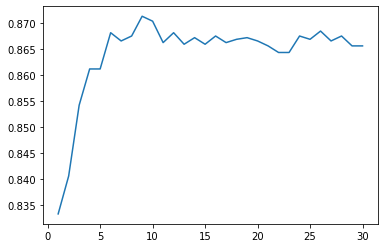

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kr1= range(1,31)
scores1={}
score_list1= []
for k in kr:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x1_train,y1_train)
    y1_pred2= knn.predict(x1_test)
    scores1[k]= metrics.accuracy_score(y1_test,y1_pred2)
    score_list1.append(metrics.accuracy_score(y1_test,y1_pred2))
sns.lineplot(kr1,score_list1)
plt.show()

In [16]:
# Using KNN
knn1= KNeighborsClassifier(n_neighbors=9)
knn1.fit(x1_train,y1_train)
y1_pred2= knn1.predict(x1_test)
metrics.accuracy_score(y1_test,y1_pred2)

0.871387742140362

# Investigating which variables seem to be better predictors of employee departure.

In [17]:
df.groupby(['salary','status']).count()['left']

salary  status
high    0         1106
        1          442
low     0          990
        1          391
medium  0         4660
        1         1951
Name: left, dtype: int64

Observations from above table: 
1) Among employees with high salaries, 28.55% of them left the company.
2) Among employees with low salary, 28.31% of them left the compaby.
3) Among employees with medium salary, 29.51% of them left the comany

Since the employee turnover in all the above cases are very close, we can't predict based on salary. And hence we can use ML Models to do so.

# Observations     

First of all, there are no high correlations among target variable and predictor variable. But there is a good correlation of status with review, so we will be using review all the time.

We also used Logistic Regression and SVM along with KNN to try out different models and check the accuracy, clearly KNN performed better.
1) In the first case of using all variables as predictor variables, the highest accuracy we got is 85.80% through KNN Classifier with n_estimator of 9.
2) In the second case, I proceeded to eliminate bonus,projects,and promoted variables because they don't have good correlations with any other variables and got accuracy of 87.13% through KNN Classifier. This is a spike of 1.33%. Considering how huge the dataset is, this is a good thing we got increase of 1.33%.

Talking about the better predictors of employee turnover, 
1) review, good correlation with status. That means higher the review (better performing employees) higher the chances of leaving the company
2) satisfaction and bonus have negative correlation with status. That means less satisfaction and no bonus leads to higher chance of employee leaving the company.
3) avg_hrs_month and status have positive correlation with the status.

# Recommendations to reduce employee turnover

1) From the correlations and observations, I've observed confident employees with good review, and less satisfaction are tend to leave the company. So my general recommendations are know the reasons of dissatisfaction and rectify them, offer benefits to employees with low salaries and assign them interesting projects. From graphs and calculations we can't make best recommendations actually. 

2) My best idea to prevent employee turnover is to train a KNN Classifier model with previous employee data and test with current employees and predict the employees who might leave. Now from the predictions consider data of people who are gonna leave and further analyse it and rectify the problems.

Example: Now, we've tested the current employee data with KNN Classifier trained with previous data. Now we can seperate data of employees from prediction who are gonna leave. In that data, 
1) let's consider employees with low salary and good performance, we can make them stay by increasing salary
2) Now, employees with good salary, good performance but less satisfaction, we can make them stay by assigning intersting or challenging roles.
3) Finally, employees with good performance, good satisfaction and good review but still leaving. We can make them stay by promoting them appropriately.